In [46]:
import numpy as np
import math
from scipy.constants import alpha
from scipy.stats import norm
from iminuit import Minuit, describe
from probfit import UnbinnedLH

# Part a

The likelihood is given by

$$  \mathcal{L} = exp\frac{-(m_{W}(m_{H}) - m_{W}^{meas})^2}{ 2\cdot (m_{W}^{meas}\cdot err)^2} $$

where $m_W$ is given by equation 4.10, $m_H$ is the Higgs mass, $m_{W}^{meas}$ is the W mass measurment that we assume is known and err is the percentage error on the W mass measurment. 

In [156]:
`
def mW(mH):
    
    c = [0, 0.05429, 0.008939, 0.0000890, 0.000161, 1.070, 0.5256, 0.0678, 0.00179, 0.0000659, 0.0737, 114.9]
    
    dH = np.log(mH/100)
    dh = (mH/100)**2
    d_alpha = (alpha/(1- (314.97e-4 + 276.8e-4 - 0.7e-4)))/0.05907 -1
    dt = (172.4/174.3)**2 - 1
    d_alphaS = 0.1176/0.119 - 1
    dZ = 91.1875/91.1875 - 1
    
    mw = 80.3799 - c[1]*dH -c[2]* dH**2 + c[3]* dH**4 + c[4]*(dh-1) - c[5]*d_alpha + c[6]*dt - c[7]*dt**2 + c[8]*dH*dt + c[9]*dh*dt - c[10]*d_alphaS + c[11]*dZ
    
    return mw

def gaussian_W(mH, err):
    #1/(np.sqrt(2*np.pi)*mW(mH)*0.01)
    return  np.exp(-np.power(mW(mH) - 81.286, 2.) / (2 * np.power(81.286*err, 2.)))

mW(125) # test

81.28637023759819

Assume error on $m_W$ measurment is 1\%:

In [157]:
def nll(mH):
    
    return -np.log(gaussian_W(mH, err = 0.01))
    #return -np.log(n)
    
m = Minuit(nll, mH = 125)
m.limits = [(121, 130)]
m.errordef = Minuit.LIKELIHOOD
m.migrad()
m.hesse()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 3.365e-11                  │              Nfcn = 15               │
│ EDM = 3.4e-11 (Goal: 0.0001)     │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mH   │    126    │     5     │            │            │   121   │   130   │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────┐
│    │      mH │
├────┼─────────┤
│ mH │ 3.157e6 │
└────┴─────────┘

In [159]:
val_mh = m.values["mH"]
err_mh = m.errors[0]
print("mH = ", val_mh)
print("error on mH = ", err_mh)

mH =  125.81677356792345
error on mH =  5.6528044288142425


(array([114.51116471, 114.73956085, 114.96795699, 115.19635313,
        115.42474926, 115.6531454 , 115.88154154, 116.10993768,
        116.33833382, 116.56672996, 116.7951261 , 117.02352223,
        117.25191837, 117.48031451, 117.70871065, 117.93710679,
        118.16550293, 118.39389907, 118.6222952 , 118.85069134,
        119.07908748, 119.30748362, 119.53587976, 119.7642759 ,
        119.99267204, 120.22106817, 120.44946431, 120.67786045,
        120.90625659, 121.13465273, 121.36304887, 121.591445  ,
        121.81984114, 122.04823728, 122.27663342, 122.50502956,
        122.7334257 , 122.96182184, 123.19021797, 123.41861411,
        123.64701025, 123.87540639, 124.10380253, 124.33219867,
        124.56059481, 124.78899094, 125.01738708, 125.24578322,
        125.47417936, 125.7025755 , 125.93097164, 126.15936778,
        126.38776391, 126.61616005, 126.84455619, 127.07295233,
        127.30134847, 127.52974461, 127.75814075, 127.98653688,
        128.21493302, 128.44332916, 128.

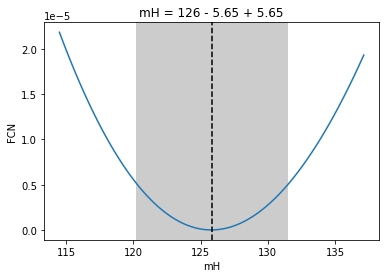

In [160]:
m.draw_profile("mH")

Assume error on $m_W$ is 0.1\%:

In [161]:
def nll(mH):
    
    return -np.log(gaussian_W(mH, err = 0.001))
    #return -np.log(n)
    
m = Minuit(nll, mH = 125)
m.limits = [(121, 130)]
m.errordef = Minuit.LIKELIHOOD
m.migrad()
m.hesse()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 3.376e-09                  │              Nfcn = 13               │
│ EDM = 3.38e-09 (Goal: 0.0001)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mH   │    126    │     7     │            │            │   121   │   130   │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────┐
│    │      mH │
├────┼─────────┤
│ mH │ 3.119e4 │
└────┴─────────┘

In [163]:
val_mh = m.values["mH"]
err_mh = m.errors[0]
print("mH = ", val_mh)
print("error on mH = ", err_mh)

mH =  125.81679823168696
error on mH =  6.908396726993104


Assume error on $m_W$ is 0.01\%:

In [155]:
def nll(mH):
    
    return -np.log(gaussian_W(mH, err = 0.0001))
    #return -np.log(n)
    
m = Minuit(nll, mH = 125)
m.limits = [(121, 130)]
m.errordef = Minuit.LIKELIHOOD
m.migrad()
m.hesse()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 3.391e-07                  │              Nfcn = 13               │
│ EDM = 3.39e-07 (Goal: 0.0001)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mH   │    126    │     6     │            │            │   121   │   130   │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────┐
│    │      mH │
├────┼─────────┤
│ mH │ 311.825 │
└────┴─────────┘

In [145]:
val_mh = m.values["mH"]
err_mh = m.errors[0]
print("mH = ", val_mh)
print("error on mH = ", err_mh)

mH =  125.81683037976998
error on mH =  5.82828715456516


# Part b

Now the likelihood is given by the product of two gaussians:

$$  \mathcal{L} = exp\frac{-(m_{W}(m_{H}, m_t) - m_{W}^{meas})^2}{ 2\cdot (m_{W}^{meas}\cdot err)^2}\cdot exp\frac{-(m_{t}- m_{t}^{meas})^2}{ 2\cdot (m_{t}^{meas}\cdot err)^2} $$

where $m_t$ is treated as a fixed parameter in the fit, $m_t^{meas}$ is the mass of the top from measurment which we assume is known and err is the percentage error on the W and t mass measurment. 

Assume error on $m_W$ is 0.1\% and error on $m_t$ is 1\%:

In [173]:
def mW(mH, mt):
    
    c = [0, 0.05429, 0.008939, 0.0000890, 0.000161, 1.070, 0.5256, 0.0678, 0.00179, 0.0000659, 0.0737, 114.9]
    
    dH = np.log(mH/100)
    dh = (mH/100)**2
    d_alpha = (alpha/(1- (314.97e-4 + 276.8e-4 - 0.7e-4)))/0.05907 -1
    dt = (mt/174.3)**2 - 1
    d_alphaS = 0.1176/0.119 - 1
    dZ = 91.1875/91.1875 - 1
    
    mw = 80.3799 - c[1]*dH -c[2]* dH**2 + c[3]* dH**4 + c[4]*(dh-1) - c[5]*d_alpha + c[6]*dt - c[7]*dt**2 + c[8]*dH*dt + c[9]*dh*dt - c[10]*d_alphaS + c[11]*dZ

    return mw

def gaussian_W(mH,mt, err):
    #1/(np.sqrt(2*np.pi)*mW(mH)*0.01)
    return  np.exp(-np.power(mW(mH, mt) - 81.286, 2.) / (2 * np.power(81.286*err, 2.)))    

def gaussian_t(mt, err):
    
    #1/(np.sqrt(2*np.pi)*mW(mH)*0.01)
    return  np.exp(-np.power(mt - 174.3, 2.) / (2 * np.power(mt*err, 2.)))

def nll(mH, mt):
    
    return -np.log(gaussian_W(mH, mt, err = 0.01)+gaussian_t(mt, err=0.1))
    #return -np.log(n)
    
m = Minuit(nll, mH = 125, mt=172.4)
m.limits = [(121, 130), (172, 173)]
m.fixed["mt"] = True
m.errordef = Minuit.LIKELIHOOD
m.migrad()
m.hesse()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -0.6901                    │              Nfcn = 17               │
│ EDM = 1.77e-11 (Goal: 0.0001)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mH   │    126    │     5     │            │            │   121   │   130   │       │
│ 1 │ mt   │   172.4   │    1.7    │            │            │   172   │   173   │  yes  │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────┐
│    │      mH      mt │
├────┼─────────────────┤
│ mH │ 6.591e6 0.000e6 │
│ mt │ 0.000e6 0.000e6 │
└────┴─────────────────┘

In [175]:
val_mh = m.values["mH"]
err_mh = m.errors[0]
print("mH = ", val_mh)
print("error on mH = ", err_mh)

mH =  125.81677365078416
error on mH =  6.434424402420753


Assume error on $m_W$ is 0.1\% and error on $m_t$ is 0.1\%:

In [176]:
def nll(mH, mt):
    
    return -np.log(gaussian_W(mH, mt, err = 0.01)+gaussian_t(mt, err=0.01))
    #return -np.log(n)
    
m = Minuit(nll, mH = 125, mt=172.4)
m.limits = [(121, 130), (172, 173)]
m.fixed["mt"] = True
m.errordef = Minuit.LIKELIHOOD
m.migrad()
m.hesse()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -0.4349                    │              Nfcn = 15               │
│ EDM = 2.23e-11 (Goal: 0.0001)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mH   │    126    │     6     │            │            │   121   │   130   │       │
│ 1 │ mt   │   172.4   │    1.7    │            │            │   172   │   173   │  yes  │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────┐
│    │      mH      mt │
├────┼─────────────────┤
│ mH │ 4.946e6 0.000e6 │
│ mt │ 0.000e6 0.000e6 │
└────┴─────────────────┘

In [178]:
val_mh = m.values["mH"]
err_mh = m.errors[0]
print("mH = ", val_mh)
print("error on mH = ", err_mh)

mH =  125.81677361286792
error on mH =  6.441732686804222


Assume error on $m_W$ is 0.1\% and error on $m_t$ is 0.01\%:

In [179]:
def nll(mH, mt):
    
    return -np.log(gaussian_W(mH, mt, err = 0.01)+gaussian_t(mt, err=0.001))
    #return -np.log(n)
    
m = Minuit(nll, mH = 125, mt=172.4)
m.limits = [(121, 130), (172, 173)]
m.fixed["mt"] = True
m.errordef = Minuit.LIKELIHOOD
m.migrad()
m.hesse()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 3.365e-11                  │              Nfcn = 15               │
│ EDM = 3.4e-11 (Goal: 0.0001)     │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mH   │    126    │     5     │            │            │   121   │   130   │       │
│ 1 │ mt   │   172.4   │    1.7    │            │            │   172   │   173   │  yes  │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────┐
│    │      mH      mt │
├────┼─────────────────┤
│ mH │ 3.157e6 0.000e6 │
│ mt │ 0.000e6 0.000e6 │
└────┴─────────────────┘

In [181]:
val_mh = m.values["mH"]
err_mh = m.errors[0]
print("mH = ", val_mh)
print("error on mH = ", err_mh)

mH =  125.81677356792345
error on mH =  5.6528044288142425


# Part c

Now the likelihood is given by 

$$  \mathcal{L} = exp\frac{(-sin^2 \theta^\ell_{eff}(m_H)- sin^2 \theta^\ell_{eff, meas})^2}{ 2\cdot (err)^2} $$


In [184]:
def mixing_angle(mH):
    
    s0 = 0.2312527
    d = [0, 4.729e-4, 2.07e-5, 3.85e-6, -1.85e-6, 0.0207, -0.002851, 1.82e-4, -9.74e-6, 3.98e-4, -0.655]
    lH = np.log(mH/100)
    delta_H = mH/100
    delta_alpha = (alpha/(1- (314.97e-4 + 276.8e-4 - 0.7e-4)))/0.05907 - 1
    delta_alphaS = 0.1176/0.117 - 1
    delta_t = (172.4/178)**2 - 1
    delta_Z = 91.1875/91.1876 - 1
    
    res = s0 + d[1]*lH + d[2]*lH**2 + d[3]*lH**4 + d[4]*(delta_H**2 - 1) + d[5]*delta_alpha + d[6]*delta_t + d[7]*delta_t**2 + d[8]*delta_t*(delta_H - 1) + d[9]*delta_alphaS + d[10]*delta_Z
    
    return res

mixing_angle(125)

def gaussian_angle(mH, err):
    #1/(np.sqrt(2*np.pi)*mW(mH)*0.01)
    return  np.exp(-np.power(mixing_angle(mH) - 0.21356, 2.) / (2 * np.power(err, 2.)))
    

Assume precision on $sin^2 \theta^\ell_{eff}$ is $10^{-3}$:

In [198]:
def nll(mH):
    
    return -np.log(gaussian_angle(mH, err = 1e-3))
    #return -np.log(n)
    
m = Minuit(nll, mH = 125)
m.limits = [(121, 130)]
m.errordef = Minuit.LIKELIHOOD
m.migrad()
m.hesse()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 2.231e-09                  │              Nfcn = 18               │
│ EDM = 2.23e-09 (Goal: 0.1)       │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mH   │    126    │     6     │            │            │   121   │   130   │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────┐
│    │      mH │
├────┼─────────┤
│ mH │ 6.966e4 │
└────┴─────────┘

In [187]:
val_mh = m.values["mH"]
err_mh = m.errors[0]
print("mH = ", val_mh)
print("error on mH = ", err_mh)

mH =  125.99860012156873
error on mH =  6.344708119548713


Assume precision on $sin^2 \theta^\ell_{eff}$ is $10^{-4}$:

In [196]:
def nll(mH):
    
    return -np.log(gaussian_angle(mH, err = 1e-4))
    #return -np.log(n)
    
m = Minuit(nll, mH = 125)
m.limits = [(121, 130)]
m.errordef = Minuit.LIKELIHOOD
m.migrad()
m.hesse()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 2.233e-07                  │              Nfcn = 16               │
│ EDM = 2.23e-07 (Goal: 0.1)       │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mH   │    126    │     5     │            │            │   121   │   130   │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────┐
│    │      mH │
├────┼─────────┤
│ mH │ 696.551 │
└────┴─────────┘

In [197]:
val_mh = m.values["mH"]
err_mh = m.errors[0]
print("mH = ", val_mh)
print("error on mH = ", err_mh)

mH =  125.9986054049653
error on mH =  5.315424719980335


Assume precision on $sin^2 \theta^\ell_{eff}$ is $10^{-5}$:

In [193]:
def nll(mH):
    
    return -np.log(gaussian_angle(mH, err = 1e-5))
    #return -np.log(n)
    
m = Minuit(nll, mH = 125)
m.limits = [(121, 130)]
m.errordef = Minuit.LIKELIHOOD
m.migrad()
m.hesse()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 2.231e-05                  │              Nfcn = 13               │
│ EDM = 2.23e-05 (Goal: 0.0001)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mH   │   126.0   │    2.5    │            │            │   121   │   130   │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────┐
│    │    mH │
├────┼───────┤
│ mH │ 6.966 │
└────┴───────┘

In [195]:
val_mh = m.values["mH"]
err_mh = m.errors[0]
print("mH = ", val_mh)
print("error on mH = ", err_mh)

mH =  125.99859793227671
error on mH =  2.4886806156836982


# Part d

The likelihood is given by the product of two gaussians:

$$  \mathcal{L} = exp\frac{(-m_{W}(m_{H}, m_t) - m_{W}^{meas})^2}{ 2\cdot (m_{W}^{meas}\cdot err)^2}\cdot exp\frac{(-sin^2 \theta^\ell_{eff}(m_H)- sin^2 \theta^\ell_{eff, meas})^2}{ 2\cdot (err)^2} $$



In [205]:
def mW(mH):
    
    c = [0, 0.05429, 0.008939, 0.0000890, 0.000161, 1.070, 0.5256, 0.0678, 0.00179, 0.0000659, 0.0737, 114.9]
    
    dH = np.log(mH/100)
    dh = (mH/100)**2
    d_alpha = (alpha/(1- (314.97e-4 + 276.8e-4 - 0.7e-4)))/0.05907 -1
    dt = (172.4/174.3)**2 - 1
    d_alphaS = 0.1176/0.119 - 1
    dZ = 91.1875/91.1875 - 1
    
    mw = 80.3799 - c[1]*dH -c[2]* dH**2 + c[3]* dH**4 + c[4]*(dh-1) - c[5]*d_alpha + c[6]*dt - c[7]*dt**2 + c[8]*dH*dt + c[9]*dh*dt - c[10]*d_alphaS + c[11]*dZ
    
    return mw

def gaussian_W(mH, err):
    #1/(np.sqrt(2*np.pi)*mW(mH)*0.01)
    return  np.exp(-np.power(mW(mH) - 81.286, 2.) / (2 * np.power(81.286*err, 2.)))

def mixing_angle(mH):
    
    s0 = 0.2312527
    d = [0, 4.729e-4, 2.07e-5, 3.85e-6, -1.85e-6, 0.0207, -0.002851, 1.82e-4, -9.74e-6, 3.98e-4, -0.655]
    lH = np.log(mH/100)
    delta_H = mH/100
    delta_alpha = (alpha/(1- (314.97e-4 + 276.8e-4 - 0.7e-4)))/0.05907 - 1
    delta_alphaS = 0.1176/0.117 - 1
    delta_t = (172.4/178)**2 - 1
    delta_Z = 91.1875/91.1876 - 1
    
    res = s0 + d[1]*lH + d[2]*lH**2 + d[3]*lH**4 + d[4]*(delta_H**2 - 1) + d[5]*delta_alpha + d[6]*delta_t + d[7]*delta_t**2 + d[8]*delta_t*(delta_H - 1) + d[9]*delta_alphaS + d[10]*delta_Z
    
    return res

def gaussian_angle(mH, err):
    #1/(np.sqrt(2*np.pi)*mW(mH)*0.01)
    return  np.exp(-np.power(mixing_angle(mH) - 0.21356, 2.) / (2 * np.power(err, 2.)))

Assuming the error on $m_W$ is 1\% and the precision on $sin^2 \theta^\ell_{eff}$ is $10^{-3}$:

In [206]:
def nll(mH):
    
    return -np.log(gaussian_W(mH, err = 0.01)+gaussian_angle(mH, err=1e-3))
    #return -np.log(n)
    
m = Minuit(nll, mH = 125)
m.limits = [(121, 130)]
m.errordef = Minuit.LIKELIHOOD
m.migrad()
m.hesse()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -0.6931                    │              Nfcn = 20               │
│ EDM = 1.14e-09 (Goal: 0.1)       │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mH   │    126    │     6     │            │            │   121   │   130   │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────┐
│    │      mH │
├────┼─────────┤
│ mH │ 1.363e5 │
└────┴─────────┘

In [207]:
val_mh = m.values["mH"]
err_mh = m.errors[0]
print("mH = ", val_mh)
print("error on mH = ", err_mh)

mH =  125.99465745425026
error on mH =  6.263681671185857


Now including the 1\% error on top mass as well:

In [214]:
def mW(mH, mt):
    
    c = [0, 0.05429, 0.008939, 0.0000890, 0.000161, 1.070, 0.5256, 0.0678, 0.00179, 0.0000659, 0.0737, 114.9]
    
    dH = np.log(mH/100)
    dh = (mH/100)**2
    d_alpha = (alpha/(1- (314.97e-4 + 276.8e-4 - 0.7e-4)))/0.05907 -1
    dt = (mt/174.3)**2 - 1
    d_alphaS = 0.1176/0.119 - 1
    dZ = 91.1875/91.1875 - 1
    
    mw = 80.3799 - c[1]*dH -c[2]* dH**2 + c[3]* dH**4 + c[4]*(dh-1) - c[5]*d_alpha + c[6]*dt - c[7]*dt**2 + c[8]*dH*dt + c[9]*dh*dt - c[10]*d_alphaS + c[11]*dZ

    return mw

def gaussian_W(mH,mt, err):
    #1/(np.sqrt(2*np.pi)*mW(mH)*0.01)
    return  np.exp(-np.power(mW(mH, mt) - 81.286, 2.) / (2 * np.power(81.286*err, 2.)))    

def gaussian_t(mt, err):
    
    #1/(np.sqrt(2*np.pi)*mW(mH)*0.01)
    return  np.exp(-np.power(mt - 174.3, 2.) / (2 * np.power(mt*err, 2.)))

def nll(mH, mt):
    
    return -np.log(gaussian_W(mH, mt, err = 0.01)+gaussian_t(mt, err=0.01)+gaussian_angle(mH, err=1e-3))
    #return -np.log(n)
    
m = Minuit(nll, mH = 125, mt=172.4)
m.limits = [(121, 130), (172, 173)]
m.fixed["mt"] = True
m.errordef = Minuit.LIKELIHOOD
m.migrad()
m.hesse()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -0.9341                    │              Nfcn = 20               │
│ EDM = 8.92e-10 (Goal: 0.1)       │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mH   │    126    │     6     │            │            │   121   │   130   │       │
│ 1 │ mt   │   172.4   │    1.7    │            │            │   172   │   173   │  yes  │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────┐
│    │      mH      mt │
├────┼─────────────────┤
│ mH │ 1.734e5 0.000e5 │
│ mt │ 0.000e5 0.000e5 │
└────┴─────────────────┘

In [215]:
val_mh = m.values["mH"]
err_mh = m.errors[0]
print("mH = ", val_mh)
print("error on mH = ", err_mh)

mH =  125.99465897108932
error on mH =  6.396155903302464
